In [20]:
import kagglehub

path = kagglehub.dataset_download("mateuszk013/warsaw-daily-weather")
#print("Path to dataset files:", path)


In [32]:
import pandas as pd
path = '/root/.cache/kagglehub/datasets/mateuszk013/warsaw-daily-weather/versions/1'
file_path = '/kaggle/input/warsaw-daily-weather/warsaw.csv'
data = pd.read_csv(file_path, index_col='DATE',parse_dates=True)
print(data.head())

                STATION        NAME  LATITUDE  LONGITUDE  ELEVATION  PRCP  \
DATE                                                                        
1993-01-01  PLM00012375  OKECIE, PL    52.166     20.967      110.3   0.0   
1993-01-02  PLM00012375  OKECIE, PL    52.166     20.967      110.3   NaN   
1993-01-03  PLM00012375  OKECIE, PL    52.166     20.967      110.3   0.0   
1993-01-04  PLM00012375  OKECIE, PL    52.166     20.967      110.3   0.0   
1993-01-05  PLM00012375  OKECIE, PL    52.166     20.967      110.3   0.0   

            SNWD  TAVG  TMAX  TMIN  
DATE                                
1993-01-01  10.0  -8.3   NaN   NaN  
1993-01-02  10.0 -14.9   NaN   NaN  
1993-01-03  10.0 -13.6  -9.7   NaN  
1993-01-04  10.0 -10.5  -6.5 -13.3  
1993-01-05  10.0 -12.0  -8.9 -14.1  


In [47]:
data


,level_0,index,DATE,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,PRCP,SNWD,TAVG,TMAX,TMIN
0,0,0,1993-01-01,PLM00012375,"OKECIE, PL",52.166,20.967,110.3,0.0,10.0,-8.3,NaN,NaN
1,1,1,1993-01-02,PLM00012375,"OKECIE, PL",52.166,20.967,110.3,0.0,10.0,-14.9,NaN,NaN
2,2,2,1993-01-03,PLM00012375,"OKECIE, PL",52.166,20.967,110.3,0.0,10.0,-13.6,-9.700000,NaN
3,3,3,1993-01-04,PLM00012375,"OKECIE, PL",52.166,20.967,110.3,0.0,10.0,-10.5,-6.500000,-13.3
4,4,4,1993-01-05,PLM00012375,"OKECIE, PL",52.166,20.967,110.3,0.0,10.0,-12.0,-8.900000,-14.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10949,10949,10949,2022-12-27,PLM00012375,"OKECIE, PL",52.166,20.967,110.3,8.4,150.0,4.7,9.400000,2.7
10950,10950,10950,2022-12-28,PLM00012375,"OKECIE, PL",52.166,20.967,110.3,0.0,150.0,3.3,9.333333,3.2
10951,10951,10951,2022-12-29,PLM00012375,"OKECIE, PL",52.166,20.967,110.3,0.5,150.0,6.8,9.266667,3.7
10952,10952,10952,2022-12-30,PLM00012375,"OKECIE, PL",52.166,20.967,110.3,0.0,150.0,6.1,9.200000,2.0


The average daily temperatures from 1993 to 2022 were plotted. It has become obvious that this dataset is a time-series dataset, as the temperature values are ordered chronologically, with each average daily temperature corresponding to a specific date. This sequential nature enables analysis of trends and patterns in temperature over time.

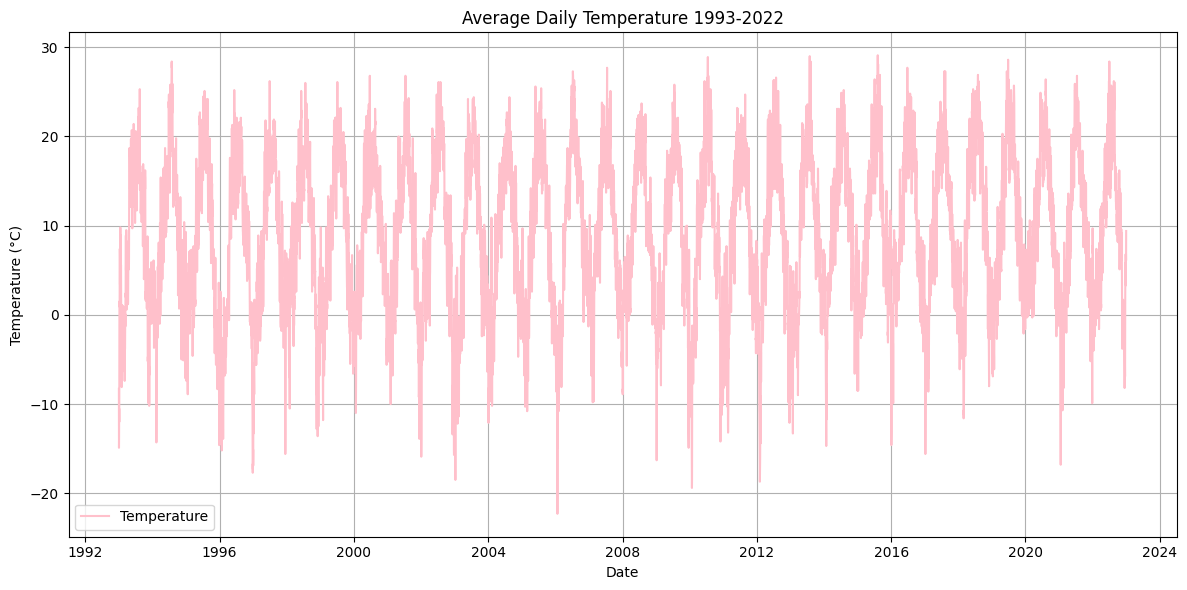

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(data['TAVG'], color='pink', label='Temperature')
plt.title('Average Daily Temperature 1993-2022')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

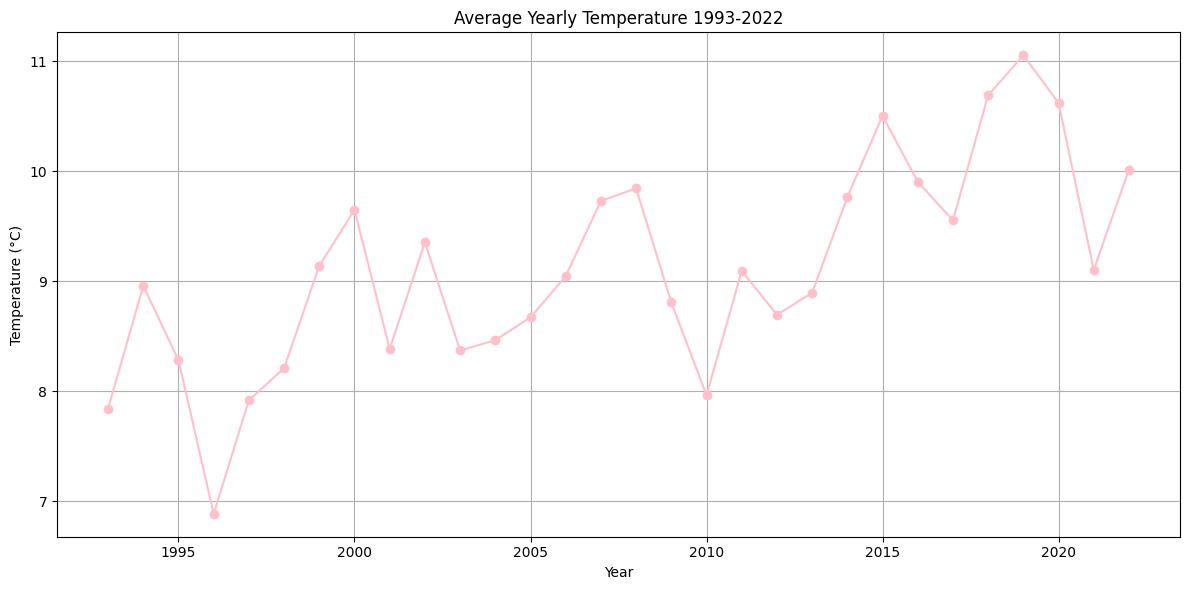

In [34]:
average_by_year = data['TAVG'].groupby(data.index.year).mean()
plt.figure(figsize=(12,6))
average_by_year.plot(marker='o', color='pink')
plt.title('Average Yearly Temperature 1993-2022')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.tight_layout()
plt.show()

The time-series dataset was decomposed into trend, seasonality and residual.

**Trend** is the long-term direction of data. In this case it is increasing - indicating a general upward movement over time.

**Seasonality** reveals repeating cycles in the data. In this dataset seasonality is characterized by regular fluctuations, likely due to seasonal changes in temperature, such as warmer temperatures in summer and colder temperatures in winter.

**Residual** (or noise) is unpredictable, they cannot be explained by trend nor seasonality.

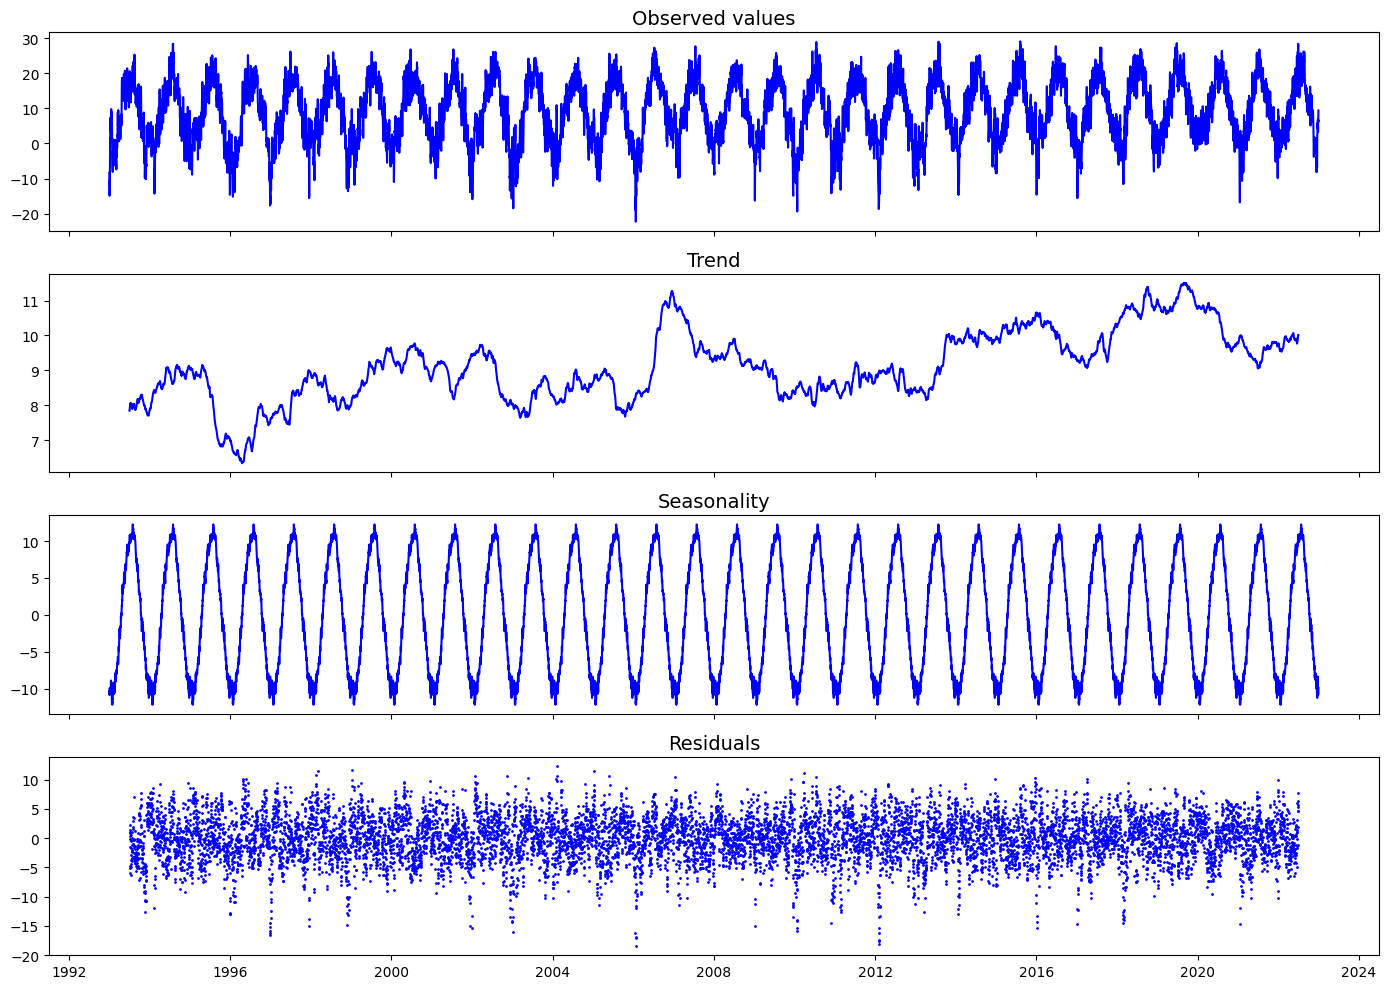

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data['TAVG'], period=365)

fig, axes = plt.subplots(4, 1, figsize=(14, 10), sharex=True)


axes[0].plot(result.observed, color='blue')
axes[0].set_title('Observed values', fontsize=14)

axes[1].plot(result.trend, color='blue')
axes[1].set_title('Trend', fontsize=14)

axes[2].plot(result.seasonal, color='blue')
axes[2].set_title('Seasonality', fontsize=14)

axes[3].scatter(result.resid.index, result.resid, color='blue', s=1)
axes[3].set_title('Residuals', fontsize=14)


plt.tight_layout()
plt.show()


**Data preprocessing**

The missing values were filled using Time-Based Interpolation, which estimates the missing data points based on the surrounding values and the time intervals between them. The values were scale using MinMaxScaler, which normalizes the data to a specified range (between 0 and 1), making it suitable for further analysis and modeling.

In [36]:
missing_values = data.isnull().sum()
print(missing_values)

STATION         0
NAME            0
LATITUDE        0
LONGITUDE       0
ELEVATION       0
PRCP         1796
SNWD         9531
TAVG            0
TMAX         3491
TMIN         5084
dtype: int64


In [37]:
data = data.interpolate(method='time')

<ipython-input-37-b1b98ad5cb43>:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  data = data.interpolate(method='time')


In [38]:
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
numeric_data = data[numeric_columns]

In [39]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(numeric_data)

In [40]:
scaled_data = pd.DataFrame(scaled_data, columns=numeric_data.columns)
temp = scaled_data['TAVG']


In [41]:
import numpy as np

**Data Spliting**

The dataset is split into a training and validation set. The training set consists of average daily temperatures from 2007 to 2020, while the validation set includes average daily temperatures from 2021 to 2022. The entire dataset was remodeled into instances, each consisting of a window (sequence) of previous data (x), which is used to predict the next values (y). This transformation enables efficient management of time-series data in Tensor Flow, particularly for models such as LSTM and GRU.

In [42]:
# [[[1], [2], [3], [4], [5]]] [6]
# [[[2], [3], [4], [5], [6]]] [7]
# [[[3], [4], [5], [6], [7]]] [8]

def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [43]:
WINDOW_SIZE = 5
X, y = df_to_X_y(temp, WINDOW_SIZE)
X.shape, y.shape

((10949, 5, 1), (10949,))

In [62]:
#data.reset_index(inplace=True)  # vrati 'DATE' iz indeksa u kolonu

mask_train = (data['DATE'] >= '2007-01-01') & (data['DATE'] <= '2020-12-31')
train_indices = data[mask_train].index

mask_test = (data['DATE'] >= '2021-01-01') & (data['DATE'] <= '2022-12-26')
test_indices = data[mask_test].index

X_train1 = X[train_indices]
y_train1 = y[train_indices]
X_val1 = X[test_indices]
y_val1 = y[test_indices]

X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape

((5114, 5, 1), (5114,), (723, 5, 1), (723,))

**Neural Network Architecture**

**Long Short - Term Memory (LSTM)**

**LSTM** is a type of recurrent neural network (RNN) specifically designed to handle sequential data and capture dependencies over time. Unlike traditional RNNs, which struggle with the vanishing and exploding gradient problems during training, LSTMs overcome these challenges by incorporating special gating mechanisms. These gates enable LSTMs to selectively retain important information over long periods of time.

**Gated reccurent unit (GRU)**

**GRU** networks were also implemented. They are similar to LSTM, however computationally less expensive and faster to train. Despite having fewer parameters, GRUs often perform comparably to LSTMs on many tasks, making them a popular choice when computational efficiency is a concern.

In [68]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError,MeanAbsoluteError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((5, 1)))
model1.add(LSTM(64))
model1.add(Dense(32, 'relu'))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 8)              │           264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,249 (75.19 KB)

 Trainable params: 19,249 (75.19 KB)

 Non-trainable params: 0 (0.00 B)

In [69]:
cp1 = ModelCheckpoint('model/my_model.keras', save_best_only=False)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError(),  MeanAbsoluteError()])

In [70]:
import time
start = time.time()
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp1])
end = time.time()
print(f"Total time: {end - start:.2f} seconds")

Epoch 1/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.2558 - mean_absolute_error: 0.4664 - root_mean_squared_error: 0.5004 - val_loss: 0.0088 - val_mean_absolute_error: 0.0767 - val_root_mean_squared_error: 0.0938
Epoch 2/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0067 - mean_absolute_error: 0.0651 - root_mean_squared_error: 0.0819 - val_loss: 0.0056 - val_mean_absolute_error: 0.0596 - val_root_mean_squared_error: 0.0748
Epoch 3/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0056 - mean_absolute_error: 0.0593 - root_mean_squared_error: 0.0750 - val_loss: 0.0052 - val_mean_absolute_error: 0.0572 - val_root_mean_squared_error: 0.0718
Epoch 4/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0049 - mean_absolute_error: 0.0551 - root_mean_squared_error: 0.0701 - val_loss: 0.0047 - val_mean_absolute_error: 0.0548 - val_root_mean_squared_error: 0.0689
Epoch 5/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0046 - mean_absolute_error: 0.0537 - root_mean_s

In [71]:
from tensorflow.keras.models import load_model
model1 = load_model('model/my_model.keras')

In [72]:
train_predictions = model1.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


,Train Predictions,Actuals
0,0.528811,0.552529
1,0.527732,0.556420
2,0.533615,0.509728
3,0.531073,0.603113
4,0.548194,0.651751
...,...,...
5109,0.481207,0.435798
5110,0.480479,0.451362
5111,0.469366,0.468872
5112,0.460031,0.494163


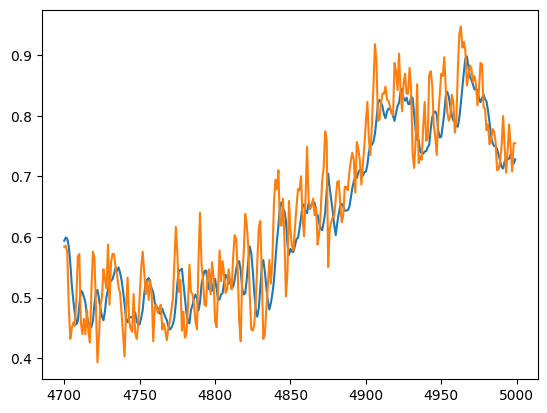

In [77]:
plt.plot(train_results['Train Predictions'][4700:5000])
plt.plot(train_results['Actuals'][4700:5000])

In [78]:
val_predictions = model1.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val1})
val_results

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


,Val Predictions,Actuals
0,0.472146,0.466926
1,0.476395,0.453307
2,0.474798,0.447471
3,0.469386,0.428016
4,0.456968,0.433852
...,...,...
718,0.525383,0.525292
719,0.528851,0.498054
720,0.519656,0.566148
721,0.528651,0.552529


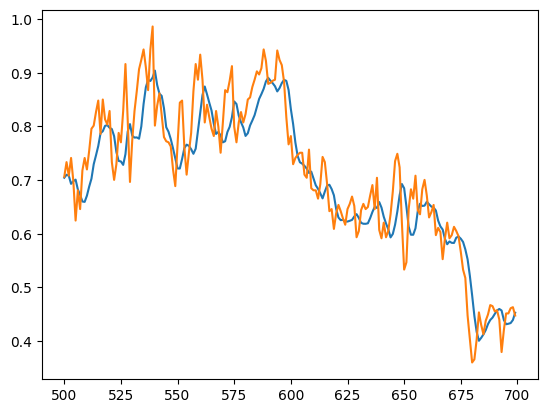

In [80]:
plt.plot(val_results['Val Predictions'][500:700])
plt.plot(val_results['Actuals'][500:700])

In [81]:
from tensorflow.keras.layers import GRU


In [82]:
model1 = Sequential()
model1.add(InputLayer((5, 1)))

model1.add(GRU(64, return_sequences=False))

model1.add(Dense(32, activation='relu'))
model1.add(Dense(8, activation='relu'))
model1.add(Dense(1, activation='linear'))

In [83]:
model1.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 64)             │        12,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 8)              │           264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,217 (59.44 KB)

 Trainable params: 15,217 (59.44 KB)

 Non-trainable params: 0 (0.00 B)

In [84]:
cp1 = ModelCheckpoint('model/my_model.keras', save_best_only=False)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError(), MeanAbsoluteError()])

In [85]:
start = time.time()
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp1])
end = time.time()
print(f"Total time: {end - start:.2f} seconds")

Epoch 1/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.2442 - mean_absolute_error: 0.4565 - root_mean_squared_error: 0.4891 - val_loss: 0.0076 - val_mean_absolute_error: 0.0713 - val_root_mean_squared_error: 0.0869
Epoch 2/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0062 - mean_absolute_error: 0.0631 - root_mean_squared_error: 0.0788 - val_loss: 0.0053 - val_mean_absolute_error: 0.0585 - val_root_mean_squared_error: 0.0727
Epoch 3/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0053 - mean_absolute_error: 0.0580 - root_mean_squared_error: 0.0729 - val_loss: 0.0048 - val_mean_absolute_error: 0.0554 - val_root_mean_squared_error: 0.0693
Epoch 4/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0048 - mean_absolute_error: 0.0546 - root_mean_squared_error: 0.0691 - val_loss: 0.0044 - val_mean_absolute_error: 0.0528 - val_root_mean_squared_error: 0.0662
Epoch 5/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0045 - mean_absolute_error: 0.0529 - root_mean_s

In [86]:
from tensorflow.keras.models import load_model
model1 = load_model('model/my_model.keras')

In [87]:
train_predictions = model1.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


,Train Predictions,Actuals
0,0.533407,0.552529
1,0.536989,0.556420
2,0.543734,0.509728
3,0.535540,0.603113
4,0.556941,0.651751
...,...,...
5109,0.486664,0.435798
5110,0.476659,0.451362
5111,0.467278,0.468872
5112,0.464487,0.494163


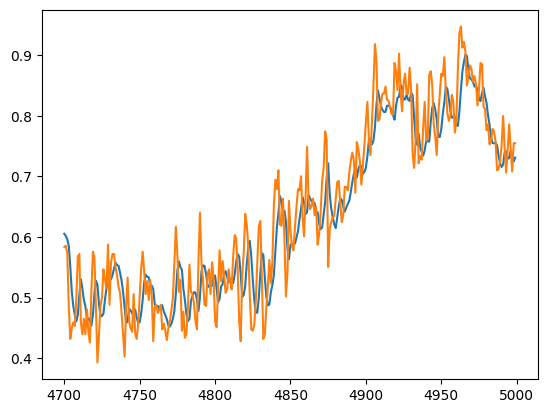

In [88]:
plt.plot(train_results['Train Predictions'][4700:5000])
plt.plot(train_results['Actuals'][4700:5000])

In [89]:
val_predictions = model1.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val1})
val_results

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


,Val Predictions,Actuals
0,0.483725,0.466926
1,0.483374,0.453307
2,0.477437,0.447471
3,0.469815,0.428016
4,0.456828,0.433852
...,...,...
718,0.534953,0.525292
719,0.534755,0.498054
720,0.523088,0.566148
721,0.535948,0.552529


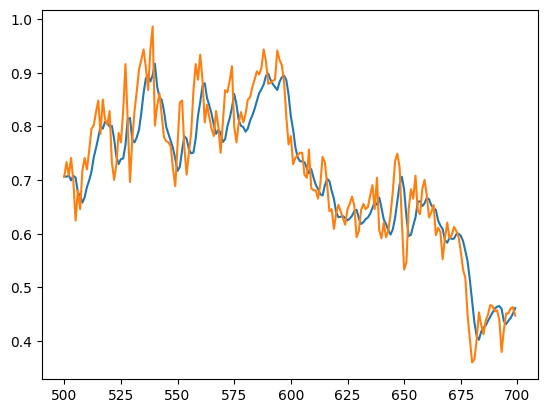

In [90]:
plt.plot(val_results['Val Predictions'][500:700])
plt.plot(val_results['Actuals'][500:700])